In [16]:
import pandas as pd

In [17]:
gov_expenditure = pd.read_excel('imf_government_expenditure.xls') 

In [18]:
gov_expenditure['Country'] = gov_expenditure['Country'].sort_values(ascending=True).reset_index(drop=True)

In [19]:
paises = gov_expenditure['Country'].unique().tolist()

In [20]:
tic_egov = pd.read_excel('ict_in_government2.xlsx')

In [21]:
tic_egov['Country'] = tic_egov['Country'].sort_values(ascending=True).reset_index(drop=True)

In [22]:
country_mapping = {
    "China, People's Republic of": "China",
    "Korea, Republic of": "Republic of Korea",
    "Türkiye, Republic of": "Turkey",
    "Congo, Republic of": "Congo"
}

In [23]:
tic_egov['Country'] = tic_egov['Country'].rename(country_mapping)

In [24]:
tic_egov = tic_egov[tic_egov['Country'].isin(paises)].reset_index(drop=True)

In [25]:
paises = tic_egov['Country'].unique().tolist()

In [26]:
gov_expenditure = gov_expenditure[gov_expenditure['Country'].isin(paises)].reset_index(drop=True)

In [27]:
dispersao = pd.DataFrame()

In [28]:
dispersao['Soma das Respostas Positivas'] = tic_egov['Soma']

In [29]:
dispersao['Gastos do governo, porcentagem do PIB'] = gov_expenditure['Percentage']

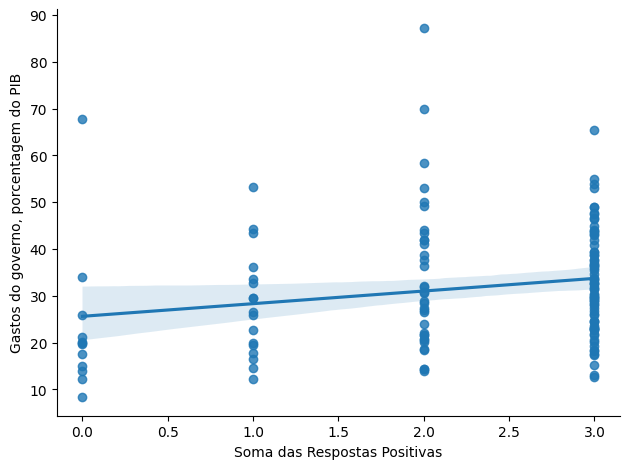

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(data=dispersao, y='Gastos do governo, porcentagem do PIB', x='Soma das Respostas Positivas')

sns.despine()
plt.tight_layout()
plt.savefig('C:/Users/lazar/Master-Dissertation/figuras/egdi/dispersao_ticegov_govexpenditure.png', dpi=300, bbox_inches='tight')
plt.show()